## Linear Regression with symbol

This sample constructs a simple linear regression model with symbol.

To caculate the weights and bias of the following formula:

x1*weight1 + x2*weight2 + bias = y

In [6]:
import mxnet as mx
import numpy as np

#### Generate sample data

In [7]:
b = 123
w1 = 6174
w2 = 1949101

sample_number = 100

x1 = np.random.rand(sample_number)
x2 = np.random.rand(sample_number)
noise = np.random.rand(sample_number)

x0_array = mx.nd.ones((sample_number,))
x1_array = mx.nd.array(x1)-0.5
x2_array = mx.nd.array(x2)-0.5
noise_array = mx.nd.array(noise)-0.5

x_data = mx.nd.concat(x0_array, x1_array, x2_array, dim=0).reshape((3,sample_number)).T
y_data = x1_array*w1 + x2_array*w2 + b + noise_array*0.01

x_data[0:3].asnumpy()

array([[ 1.        ,  0.32339293, -0.48342928],
       [ 1.        ,  0.25674731,  0.1699068 ],
       [ 1.        ,  0.01680988,  0.24025327]], dtype=float32)

#### Construct the model

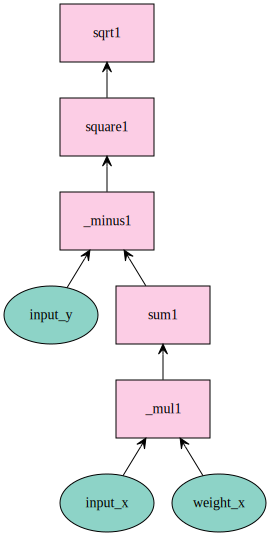

In [8]:

input_x = mx.sym.Variable("input_x")
weight_x = mx.sym.Variable("weight_x")

input_y = mx.sym.Variable("input_y")

multiple_result = input_x * weight_x

sum_result = mx.sym.sum(multiple_result)

lost = mx.sym.sqrt(mx.sym.square(input_y - sum_result))

mx.viz.plot_network(symbol = lost)

#### Create the init weights

weight_x_para is the placeholder of weights and bias

weight_x_g is used to store gradience 

In [9]:
weight_x_para = mx.nd.empty((3,))

weight_x_g = mx.nd.zeros((3,))



#### Train the model

With for loop, we can call the forward and backward function again and again, to caculate the gradience of weights and then udpate the weights

In [10]:

for i in range(0,sample_number-1):
    exe = lost.bind(mx.cpu(), {"input_x":x_data[i],"weight_x":weight_x_para, "input_y":y_data[i]}, \
                args_grad = {'weight_x':weight_x_g})
    result = exe.forward(is_train=True)

    lost_value = result[0].asscalar()
    
    print "lost is",
    print lost_value
        
    exe.backward(result[0])
    
    weight_x_para = weight_x_para - weight_x_g
   
print "weight is: [b, w1, w2]"
print weight_x_para.asnumpy()



lost is 940132.0
lost is 1.27385e+06
lost is 26786.7
lost is 632488.0
lost is 105299.0
lost is 89087.8
lost is 55645.5
lost is 741254.0
lost is 883046.0
lost is 469867.0
lost is 82252.3
lost is 149266.0
lost is 242335.0
lost is 223579.0
lost is 660.0
lost is 110483.0
lost is 3401.61
lost is 104217.0
lost is 74272.6
lost is 92348.4
lost is 158651.0
lost is 62438.1
lost is 62677.9
lost is 24181.9
lost is 58205.5
lost is 34639.6
lost is 11462.6
lost is 114414.0
lost is 78018.9
lost is 32115.9
lost is 26737.6
lost is 10657.4
lost is 6650.88
lost is 25333.9
lost is 40787.7
lost is 18021.4
lost is 30166.0
lost is 4563.81
lost is 2107.38
lost is 18895.5
lost is 18225.9
lost is 9810.26
lost is 17030.0
lost is 14620.1
lost is 4606.06
lost is 4419.81
lost is 3165.25
lost is 615.5
lost is 3955.78
lost is 13524.2
lost is 9637.56
lost is 5230.48
lost is 9364.56
lost is 216.062
lost is 984.812
lost is 972.312
lost is 1827.69
lost is 3815.14
lost is 2058.7
lost is 3235.12
lost is 5043.31
lost is 2471